**Atualizando a biblioteca para plotagem de gráficos**


In [223]:
!pip -q install plotly --upgrade
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install -U scikit-learn

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.11/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

**Importando bibliotecas**

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [225]:
base = pd.read_csv('~/Documentos/Faculdade/Quarto_Periodo/IA/Bases/Play.csv', sep=',')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [226]:
#base2 = pd.read_csv('/content/sample_data/restaurante.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [227]:
base

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [228]:
base.head(3)

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes


In [229]:
base.tail(2)

,outlook,temperature,humidity,windy,play
12,overcast,hot,normal,False,yes
13,rainy,mild,high,True,no


**Contando quantidade de instâncias**


In [230]:
np.unique(base['play'], return_counts=True)

(array(['no', 'yes'], dtype=object), array([5, 9]))

<AxesSubplot: xlabel='play', ylabel='count'>

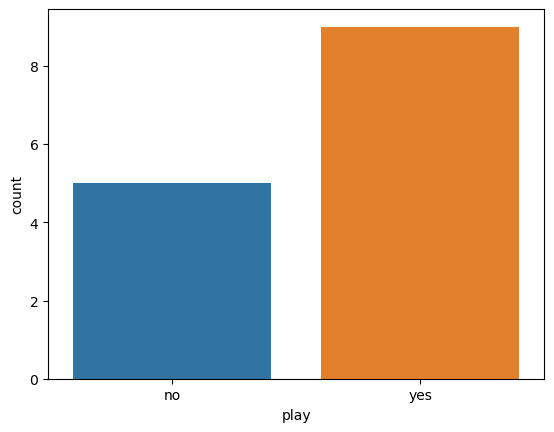

In [231]:
sns.countplot(x = base['play'])

**Separando os atributos de entrada e de classe**

In [232]:
X_prev = base.iloc[:, 0:4].values

In [233]:
X_prev

array([['sunny', 'hot', 'high', False],
       ['sunny', 'hot', 'high', True],
       ['overcast', 'hot', 'high', False],
       ['rainy', 'mild', 'high', False],
       ['rainy', 'cool', 'normal', False],
       ['rainy', 'cool', 'normal', True],
       ['overcast', 'cool', 'normal', True],
       ['sunny', 'mild', 'high', False],
       ['sunny', 'cool', 'normal', False],
       ['rainy', 'mild', 'normal', False],
       ['sunny', 'mild', 'normal', True],
       ['overcast', 'mild', 'high', True],
       ['overcast', 'hot', 'normal', False],
       ['rainy', 'mild', 'high', True]], dtype=object)

In [234]:
X_prev_label = base.iloc[:, 0:4]

In [235]:
X_prev_label

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [236]:
X_prev[:,3]

array([False, True, False, False, False, True, True, False, False, False,
       True, True, False, True], dtype=object)

In [237]:
y_classe = base.iloc[:, 4].values

In [238]:
y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

**Podemos fazer esta mesma divisão (separar as variáveis de entrada e saída) usando os comandos abaixo**

In [239]:
#X = base.copy() 
#y = X.pop('Conclusao')

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [240]:
from sklearn.preprocessing import LabelEncoder

In [241]:
label_encoder = LabelEncoder()

In [242]:
X_prev[:,0]

array(['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy',
       'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
       'overcast', 'rainy'], dtype=object)

In [243]:
X_prev

array([['sunny', 'hot', 'high', False],
       ['sunny', 'hot', 'high', True],
       ['overcast', 'hot', 'high', False],
       ['rainy', 'mild', 'high', False],
       ['rainy', 'cool', 'normal', False],
       ['rainy', 'cool', 'normal', True],
       ['overcast', 'cool', 'normal', True],
       ['sunny', 'mild', 'high', False],
       ['sunny', 'cool', 'normal', False],
       ['rainy', 'mild', 'normal', False],
       ['sunny', 'mild', 'normal', True],
       ['overcast', 'mild', 'high', True],
       ['overcast', 'hot', 'normal', False],
       ['rainy', 'mild', 'high', True]], dtype=object)

In [244]:
label_encoder_Outlook = LabelEncoder()
label_encoder_Temperature = LabelEncoder()
label_encoder_Humidity = LabelEncoder()
label_encoder_Windy = LabelEncoder()

In [245]:
X_prev[:,0] = label_encoder_Outlook.fit_transform(X_prev[:,0])
X_prev[:,1] = label_encoder_Temperature.fit_transform(X_prev[:,1])
X_prev[:,2] = label_encoder_Humidity.fit_transform(X_prev[:,2])
X_prev[:,3] = label_encoder_Windy.fit_transform(X_prev[:,3])

In [246]:
X_prev

array([[2, 1, 0, 0],
       [2, 1, 0, 1],
       [0, 1, 0, 0],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [1, 2, 1, 0],
       [2, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [1, 2, 0, 1]], dtype=object)



> OneHotEncoder - Agora vamos binarizar atributos não ordinais

**Contando quantas opções de resposta tem cada atributo**

In [247]:
#len(np.unique(base['Cliente'])) 

In [248]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [249]:
X_prev

array([[2, 1, 0, 0],
       [2, 1, 0, 1],
       [0, 1, 0, 0],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [1, 2, 1, 0],
       [2, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [1, 2, 0, 1]], dtype=object)

In [250]:
X_prev[:, 3]

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=object)

In [251]:
onehotencoder_restaurante = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')


In [252]:
X_prev= onehotencoder_restaurante.fit_transform(X_prev)

In [253]:
X_prev

array([[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 1]], dtype=object)

In [254]:
X_prev.shape

(14, 8)

**Esta mesma transformação OneHotEncoder pode ser feita com o comando abaixo**

In [255]:
#base = pd.get_dummies(X_prev_label)
#base.head()

**Método de amostragem Holdout**

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_prev

array([[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 1]], dtype=object)

In [258]:
y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [259]:
y_classe.shape

(14,)

In [260]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [261]:
X_treino.shape

(11, 8)

In [262]:
X_teste.shape

(3, 8)

In [263]:
X_teste

array([[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1, 0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 0]], dtype=object)

In [264]:
y_treino

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes'], dtype=object)

In [265]:
y_teste

array(['yes', 'yes', 'yes'], dtype=object)

In [266]:
import pickle

In [267]:
with open('/home/rafael/Documentos/Faculdade/Quarto_Periodo/IA/Bases/Play.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)